In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('auto-mpg.csv', header = 0, engine = 'python')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
df = df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [4]:
print('데이터셋 크기: ', df.shape)

데이터셋 크기:  (398, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# X, Y 분할하기
Y = df['mpg']
X = df.drop(['mpg'], axis = 1, inplace = False)

In [9]:
# 훈련용 데이터, 평가용 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
# 선형회귀 분석 : 모델 생성
lr = LinearRegression()

In [11]:
# 선형회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_answer = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_answer)
rmse = np.sqrt(mse)
rmse

In [14]:
mse = mean_squared_error(Y_test, Y_answer)
rmse = np.sqrt(mse)
rmse

3.5040318258556735

In [15]:
np.round(lr.coef_, 2)

array([-0.14,  0.01, -0.01,  0.2 ,  0.76])

In [16]:
X_train[:2]

,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81


In [18]:
np.round(lr.intercept_, 2)

-17.55

In [19]:
import seaborn as sns

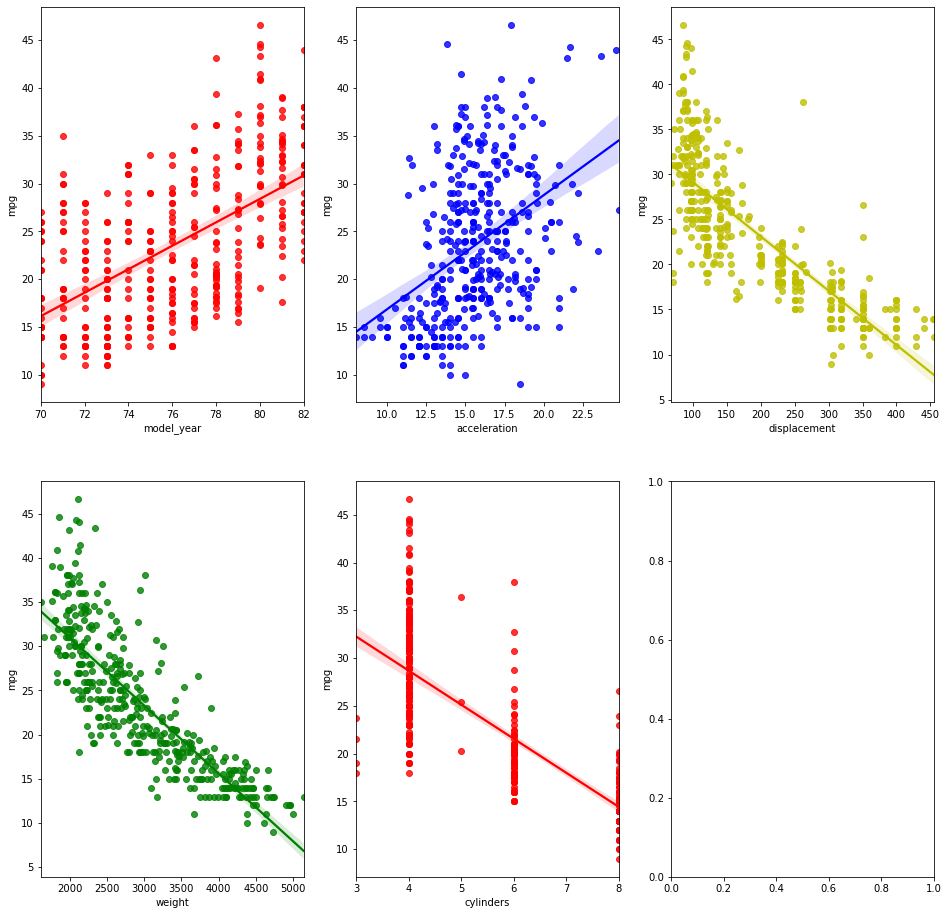

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (16,16))
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = df, ax = axes[row][col], color = plot_color[i])

In [23]:
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [24]:
pd.__version__

'1.2.4'

In [3]:
!pip install pandas == 0.24.2

ERROR: Invalid requirement: '=='


In [4]:
!pip uninstall pandas

^C
